In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:

import numpy as np
import pandas as pd
import math

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns
matplotlib.rcParams['figure.dpi'] = 125

In [4]:
coeff_10 = [1, -55, 1320, -18150, 157773, -902055, 3416930, -8409500, 12753576, -10628640, 3628800]

In [5]:
coeff = coeff_10 # polynomial degree
roots = np.roots(coeff)
print(roots)

[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


In [6]:
def perturb_coeff(a, coeff):
    coeff_perturbed = []
    for c_k in coeff:
        e_k = np.random.normal(0, 1) # mu = 0, sigma = 1
        coeff_perturbed.append(c_k*(1 + a*e_k))
    return coeff_perturbed

In [129]:
def dist(coeff_ck, new_coeff_ck):
    return [i - j for i, j in zip(new_coeff_ck, coeff_ck)]

def roots_perturb_coeff(perturb_coeff):
    perturb_coeff_full = [1] + perturb_coeff[1:]
    return np.roots(perturb_coeff_full)

In [130]:
def real_roots(roots):
    return list(roots.real[abs(roots.imag)<1e-5])

In [131]:
perturb_coeff(10**(-12), coeff)

[0.9999999999998413,
 -55.00000000001595,
 1320.000000000301,
 -18150.000000012413,
 157773.00000000285,
 -902054.9999997915,
 3416929.9999961965,
 -8409500.00000525,
 12753576.000011634,
 -10628640.000020461,
 3628800.000003107]

In [275]:
mean = np.array(real_roots(roots_perturb_coeff(perturb_coeff(10**(-10), coeff))))
tries = mean.copy()
var = []
iters = 100000
for i in range(iters):
    
    att = np.array(roots_perturb_coeff(perturb_coeff(10**(-10), coeff)))
    var.append(att)
    mean += att
mu = mean/(iters+1)
var2 = []
i = 10
for elem in np.array(var).T:
    curr_var = 0
    for num in elem:
        curr_var += (num-i)**2
    var2.append(curr_var/(iters+1))
    i-=1
var = np.var(np.array(var), axis=0)
var

array([6.68206921e-09, 1.33550292e-07, 4.73466266e-07, 5.03404850e-07,
       1.90252856e-07, 2.66042581e-08, 1.31600070e-09, 2.00773867e-11,
       7.05634600e-14, 2.82954112e-17])

In [210]:
import statistics
from statistics import variance

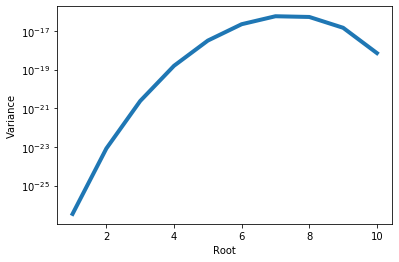

In [263]:
plt.plot([i for i in range(10, 0, -1)], var,linewidth=4, markersize=12)
plt.xlabel("Root")
plt.ylabel("Variance")
plt.yscale("log")


In [269]:
a = 10**(-10)

x = np.array([a**2* 7.6*10**(-11),a**2*2.1*10**(-4),a**2 * 4.2,a**2 *3.9*10**3,a**2 * 4.8*10**5,a**2 * 1.3*10**7,a**2 * 8.9* 10**7,
 a**2 *1.8* 10**8,a**2 * 9.3* 10**7,a**2 * 2.7* 10**6])
print(x)

[7.6e-31 2.1e-24 4.2e-20 3.9e-17 4.8e-15 1.3e-13 8.9e-13 1.8e-12 9.3e-13
 2.7e-14]


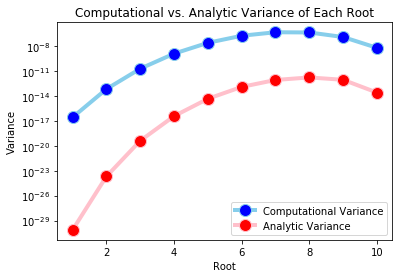

In [270]:
df = pd.DataFrame({"Computational Variance": var, "xcomp":[i for i in range(10, 0, -1)], "Analytic Variance":x, "xan":[i for i in range(1, 11)]})
# p = plt.plot([i for i in range(1, 11)], x,linewidth=4, markersize=12)
# plt.plot([i for i in range(10, 0, -1)], var,linewidth=4, markersize=12)
plt.plot( 'xcomp', 'Computational Variance', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'xan', 'Analytic Variance', data=df, marker='o', markerfacecolor='red', markersize=12, color='pink', linewidth=4)

plt.xlabel("Root")
plt.ylabel("Variance")
plt.yscale("log")
plt.title("Computational vs. Analytic Variance of Each Root")
plt.legend()
plt.show()

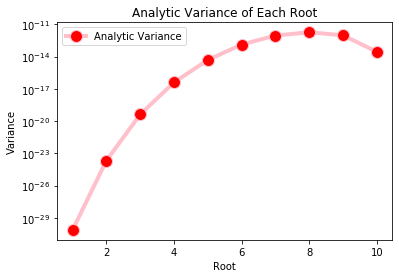

In [274]:
df = pd.DataFrame({"Computational Variance": var, "xcomp":[i for i in range(10, 0, -1)], "Analytic Variance":x, "xan":[i for i in range(1, 11)]})
# p = plt.plot([i for i in range(1, 11)], x,linewidth=4, markersize=12)
# plt.plot([i for i in range(10, 0, -1)], var,linewidth=4, markersize=12)
# plt.plot( 'xcomp', 'Computational Variance', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'xan', 'Analytic Variance', data=df, marker='o', markerfacecolor='red', markersize=12, color='pink', linewidth=4)

plt.xlabel("Root")
plt.ylabel("Variance")
plt.yscale("log")
plt.title("Analytic Variance of Each Root")
plt.legend()
plt.show()

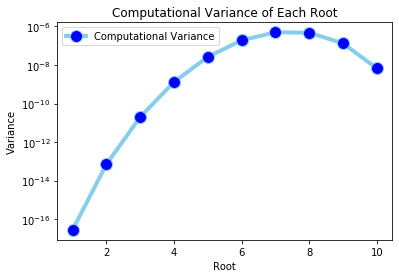

In [273]:
df = pd.DataFrame({"Computational Variance": var, "xcomp":[i for i in range(10, 0, -1)], "Analytic Variance":x, "xan":[i for i in range(1, 11)]})
# p = plt.plot([i for i in range(1, 11)], x,linewidth=4, markersize=12)
# plt.plot([i for i in range(10, 0, -1)], var,linewidth=4, markersize=12)
plt.plot( 'xcomp', 'Computational Variance', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'xan', 'Analytic Variance', data=df, marker='o', markerfacecolor='red', markersize=12, color='pink', linewidth=4)

plt.xlabel("Root")
plt.ylabel("Variance")
plt.yscale("log")
plt.title("Computational Variance of Each Root")
plt.legend()
plt.show()